In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

!pip install xgboost
import xgboost as xgb

!pip install shap
import shap

shap.initjs()

In [3]:
# Load dataset
df = pd.read_csv('e_learning_dataset_with_course_names.csv')

# Drop non-numeric columns: 'UserID', 'CourseName', 'SignUpDate', 'LastActiveDate', 'FeedbackComments'
X = df.drop(['UserID', 'CourseCompletion', 'CourseName', 'SignUpDate', 'LastActiveDate', 'FeedbackComments'], axis=1)
y = df['CourseCompletion']

X.head()

,SessionDuration,SessionsPerWeek,UserSatisfaction,QuizScores
0,47,8,3,86.093897
1,36,1,3,52.788174
2,71,4,3,94.891291
3,73,4,4,85.986530
4,36,1,4,66.933203


In [4]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = xgb.XGBClassifier(objective="binary:logistic")
model.fit(X_train, y_train)

# Find accuracy
y_pred = model.predict(X_test)
xgb_accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {xgb_accuracy_score:.4f}")

Accuracy: 0.4980


In [5]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

In [6]:
np.shape(shap_values.values)

(2500, 4)

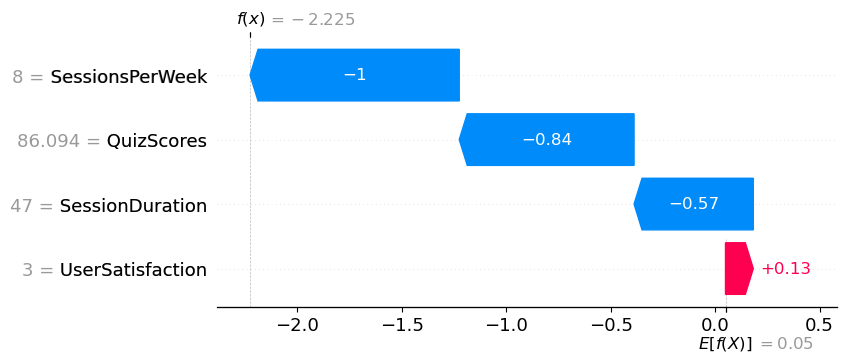

In [7]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

In [8]:
# Forceplot for first observation
shap.plots.force(shap_values[0])

In [9]:
# Stacked force plot
shap.plots.force(shap_values[0:100])

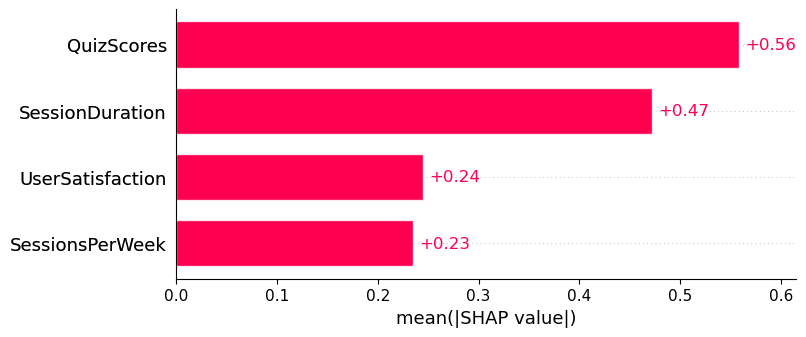

In [10]:
# Mean SHAP
shap.plots.bar(shap_values)

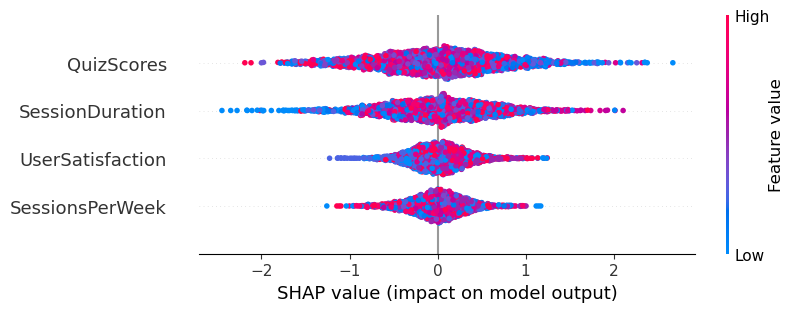

In [11]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

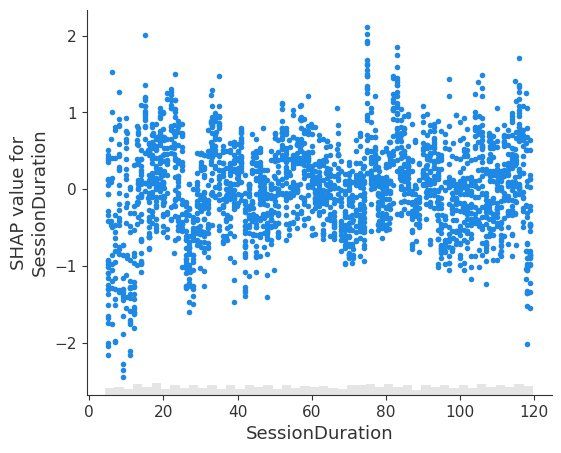

In [12]:
# Plot 1: SessionDuration
shap.plots.scatter(shap_values[:,"SessionDuration"])

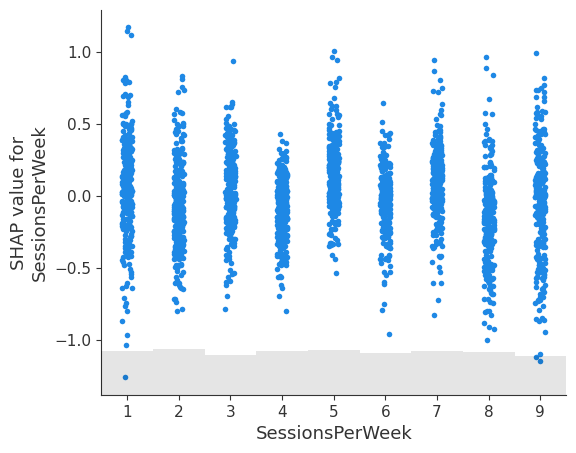

In [13]:
# Plot 2: SessionsPerWeek
shap.plots.scatter(shap_values[:,"SessionsPerWeek"])

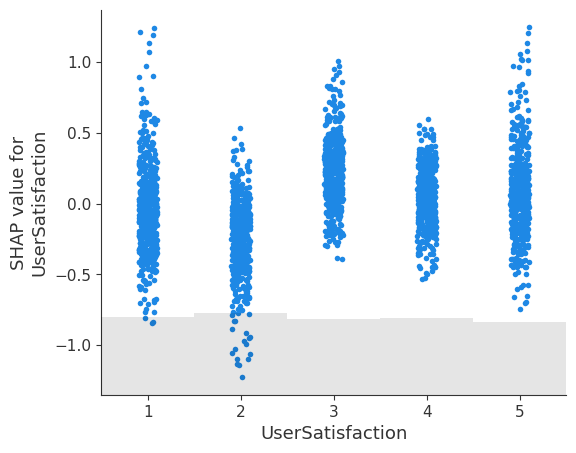

In [14]:
# Plot 3: UserSatisfaction
shap.plots.scatter(shap_values[:,"UserSatisfaction"])

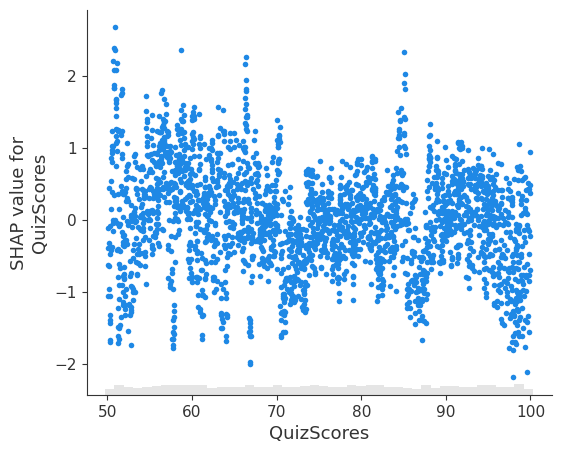

In [15]:
# Plot 4: QuizScores
shap.plots.scatter(shap_values[:,"QuizScores"])